In [1]:
 import tensorflow as tf

 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

In [2]:
# get the data

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-07-04 06:48:37--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-07-04 06:48:38 (44.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [4]:
# There is no header. Year and amount. We have to change to a numpy array

data = pd.read_csv('moore.csv', header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X = data[:,0].reshape(-1,1) #making N*D matrics
Y = data[:,1]

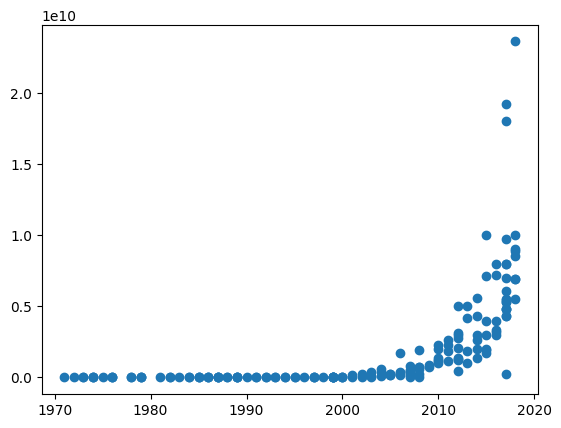

In [7]:
# Plotting the data
plt.scatter(X,Y)

In [8]:
# we can see there is an exponential growth from 2010 to 2020 onwards
# Hence we need to take the log, as we want a liner data, for linear regression. Log cancel out the exponential.

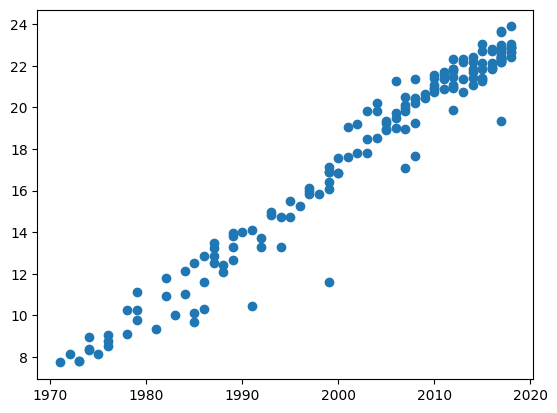

In [9]:
Y = np.log(Y)
plt.scatter(X,Y)

In [10]:
X = X - X.mean()

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
)

In [13]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


In [14]:
r = model.fit(X,Y, epochs= 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 511.1450 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 362.4211 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 311.4565 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 209.1944 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 167.1102 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 118.4664 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 88.0343 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 65.2115 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 69.3272 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 60.3239 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 7

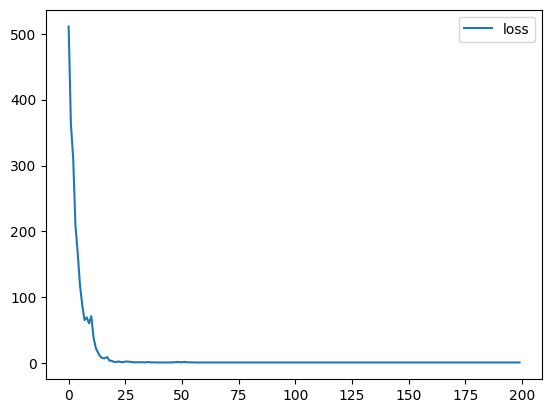

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label ='loss')
plt.legend()

In [16]:
model.layers

In [17]:
model.layers[0].get_weights()

[array([[0.3255515]], dtype=float32), array([17.761023], dtype=float32)]

In [18]:
a = model.layers[0].get_weights()[0][0,0]

In [20]:
a

0.3255515

# making predictions

6/6 [==============================] - 0s 2ms/step


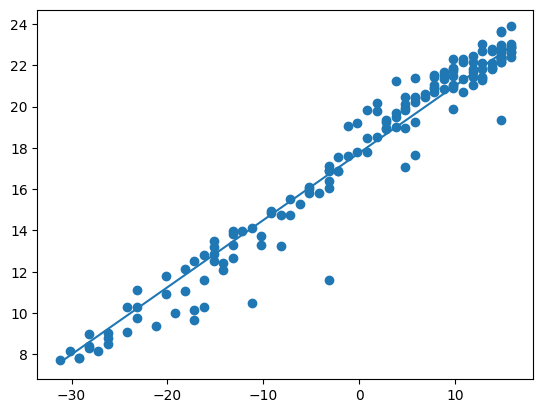

In [23]:
# make sure the line fits our data
yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,yhat)

In [24]:
# manual Calculations

# get the weights

w,b = model.layers[0].get_weights()

# Reshape X because we flttened it again earliers

X = X.reshape(-1,1)

# (N * 1) + (1*1) +1

yhat2 = (X.dot(w)+b).flatten()

np.allclose(yhat,yhat2)

True